# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state =100)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)

predict = reg.predict(X_train)
predict1 = reg.predict(X_test)


## 3. Calculate and print R-squared for both the training and the testing set.

In [39]:
from sklearn.metrics import r2_score

print("Training:", r2_score(y_train, predict))
print("Testing:", r2_score(y_test, predict1))

Training: 0.922264735149784
Testing: 0.9545650741761303


## 4. Calculate and print mean squared error for both the training and the testing set.

In [10]:
from sklearn.metrics import mean_squared_error
print('MSE training set:',  mean_squared_error(Y_train, predict))
print('MSE test set:',  mean_squared_error(Y_test, predict1))

# diff btw the actual value and the predicted outcome
# 

MSE training set: 21.649376911833603
MSE test set: 23.616994100563623


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [11]:
from sklearn.metrics import mean_absolute_error

print('MAE training set:',  mean_absolute_error(Y_train, predict))
print('MAE test set:',  mean_absolute_error(Y_test, predict1))

MAE training set: 3.265718383964076
MAE test set: 3.248482087616415


## Classification Model Evaluation

In [12]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

# putting the dataset in DataFrame

In [13]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
data['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [42]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression(max_iter = 500).fit(X_train, y_train)


train_predictions = logisticr.predict(X_train)
test_predictions = logisticr.predict(X_test)

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [43]:
from sklearn.metrics import accuracy_score

print("Training:", accuracy_score(y_train, train_predictions))
print("Testing:", accuracy_score(y_test, test_predictions))


#logisticr.score(X_test, y_test)

Training: 0.975
Testing: 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [44]:
from sklearn.metrics import balanced_accuracy_score

print("Training:", balanced_accuracy_score(y_train, train_predictions))
print("Testing:", balanced_accuracy_score(y_test, test_predictions))

#balanced_accuracy_score(y_test, predictions)

Training: 0.975839475839476
Testing: 0.9444444444444445


## 10. Calculate and print the precision score for both the training and the testing set.

In [45]:
from sklearn.metrics import precision_score

print("Training:", precision_score(y_train, train_predictions, average=None))
print("Testing:", precision_score(y_test, test_predictions, average=None))

#print(precision_score(y_test, predictions, pos_label=1, average=None))


Training: [1.         0.97674419 0.94736842]
Testing: [1.         1.         0.92857143]


## 11. Calculate and print the recall score for both the training and the testing set.

In [46]:
from sklearn.metrics import recall_score

print("Training:", recall_score(y_train, train_predictions, average=None))
print("Testing:", recall_score(y_test, test_predictions, average=None))
#print(recall_score(y_test, predictions, pos_label=1, average=None))

Training: [1.         0.95454545 0.97297297]
Testing: [1.         0.83333333 1.        ]


## 12. Calculate and print the F1 score for both the training and the testing set.

In [47]:
from sklearn.metrics import f1_score

print("Training:", f1_score(y_train, train_predictions, average=None))
print("Testing:", f1_score(y_test, test_predictions, average=None))

#print(f1_score(y_test, predictions, pos_label=1, average=None))

Training: [1.         0.96551724 0.96      ]
Testing: [1.         0.90909091 0.96296296]


In [23]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

0.9444444444444445

## 13. Generate confusion matrices for both the training and the testing set.

In [24]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions) # Calulate Confusion matrix for test set.

In [25]:
print(cm)

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


<AxesSubplot:>

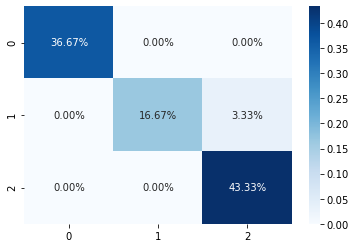

In [26]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='.1f', cmap='Blues', linewidths=.01)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.